<a href="https://colab.research.google.com/github/Raissa-hue310/Assignment-12-Neural-Network-and-Deep-Learning-Basics/blob/main/Assignment12_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment 12: Neural Network and Deep Learning Basics
Student: Raïssa Matho Mekjele  
Course: Data Analytics and Business Intelligence Analyst  
Institution: Willis College    

# 1. Dataset Preparation
We will use Fashion MNIST, which contains 70,000 grayscale images of fashion items (28×28 pixels, 10 classes).

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


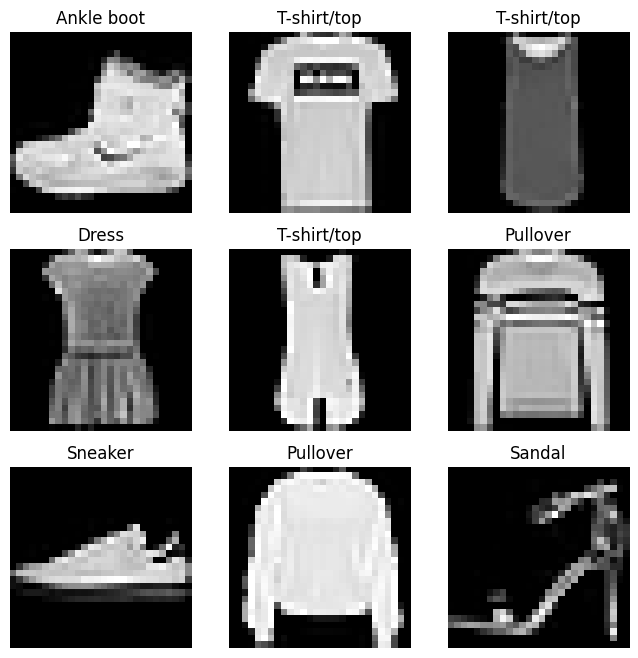

In [1]:
# Task 1: Dataset Loading and Visualization
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat',
               'Sandal','Shirt','Sneaker','Bag','Ankle boot']

# Visualize 9 sample images
plt.figure(figsize=(8,8))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.title(class_names[y_train[i]])
    plt.axis('off')
plt.show()


# 2.Image Preprocessing
Normalization

In [2]:
# Task 2: Normalization
X_train = X_train / 255.0
X_test = X_test / 255.0


Reshape for neural network

In [3]:
# Flatten 28x28 into 784
X_train_flat = X_train.reshape(-1, 784)
X_test_flat = X_test.reshape(-1, 784)


Optional Data Augmentation

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    horizontal_flip=False
)

datagen.fit(X_train.reshape(-1, 28, 28, 1))


# 3.Build Neural Network Model

A simple feedforward network with 1 hidden layer:

In [5]:
# Task 3: Neural Network Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential([
    Dense(256, activation='relu', input_shape=(784,)),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  # softmax for multiclass classification
])

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

# 4. Compile the model

In [6]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


# 5.Train the Model

In [7]:
history = model.fit(
    X_train_flat, y_train,
    epochs=15,
    batch_size=64,
    validation_split=0.2
)


Epoch 1/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7366 - loss: 0.7430 - val_accuracy: 0.8563 - val_loss: 0.3962
Epoch 2/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8450 - loss: 0.4264 - val_accuracy: 0.8613 - val_loss: 0.3772
Epoch 3/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8589 - loss: 0.3794 - val_accuracy: 0.8571 - val_loss: 0.3864
Epoch 4/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8661 - loss: 0.3606 - val_accuracy: 0.8779 - val_loss: 0.3443
Epoch 5/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8700 - loss: 0.3504 - val_accuracy: 0.8772 - val_loss: 0.3447
Epoch 6/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8790 - loss: 0.3294 - val_accuracy: 0.8787 - val_loss: 0.3354
Epoch 7/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8815 - loss: 0.3171 - val_accuracy: 0.8826 - val_loss: 0.3190
Epoch 8/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8834 - loss: 0.3116 - val_accuracy: 0

# 6.Plot Training Curves

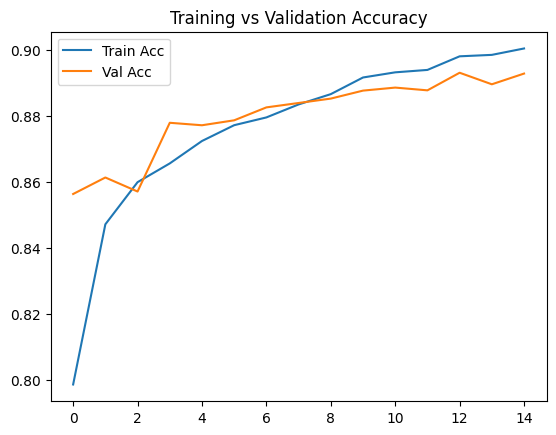

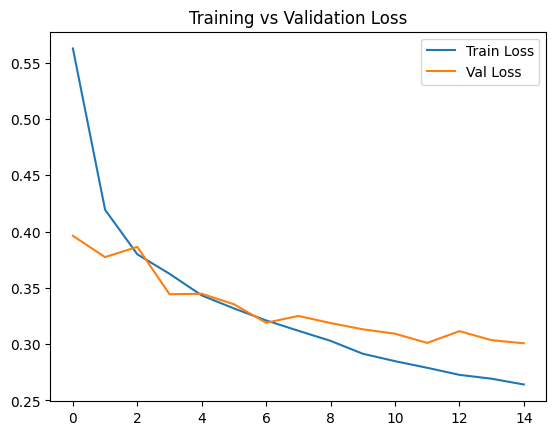

In [8]:
# Accuracy Plot
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title("Training vs Validation Accuracy")
plt.show()

# Loss Plot
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("Training vs Validation Loss")
plt.show()


# 7.Model Evaluation

In [9]:
# Evaluate model
test_loss, test_acc = model.evaluate(X_test_flat, y_test)
print("Test Accuracy:", test_acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8850 - loss: 0.3245
Test Accuracy: 0.8884999752044678


# 8.Classification Report & Confusion Matrix

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
              precision    recall  f1-score   support

 T-shirt/top       0.84      0.85      0.85      1000
     Trouser       0.98      0.97      0.98      1000
    Pullover       0.78      0.82      0.80      1000
       Dress       0.92      0.87      0.89      1000
        Coat       0.80      0.80      0.80      1000
      Sandal       0.96      0.98      0.97      1000
       Shirt       0.71      0.71      0.71      1000
     Sneaker       0.95      0.95      0.95      1000
         Bag       0.98      0.97      0.98      1000
  Ankle boot       0.97      0.95      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



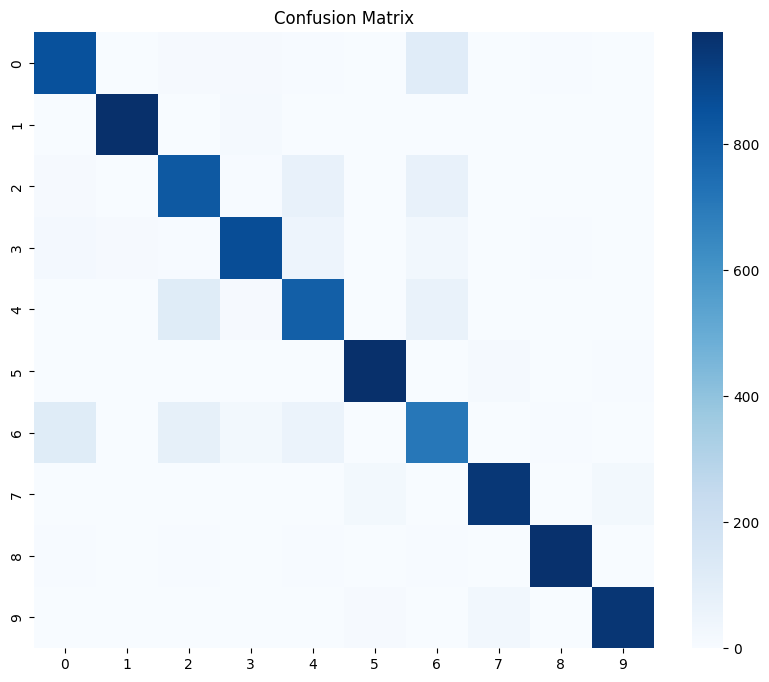

In [10]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

y_pred = np.argmax(model.predict(X_test_flat), axis=1)

# Classification report
print(classification_report(y_test, y_pred, target_names=class_names))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=False, cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


# 9.Application Demonstration
Real-world application scenario: Fashion retail inventory automation

The trained neural network can be deployed in a fashion retail environment to automatically classify clothing images for online catalogs or inventory systems. For example, when new products arrive, the system can scan each item and instantly assign it to categories such as dresses, shoes, or coats. This reduces manual labor, improves tagging consistency, and speeds up product listing workflows. In deployment, key considerations include scalability (handling thousands of images per hour), real-time processing, integration with mobile scanners or cameras, and sufficient server/GPU resources.